# Filters

In [60]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

Choose the file with the HRV signal and put it on **filename** variable.

It also takes a file with manually filtered signal on **file_filtered_by_hand** variable.

In [61]:
#File names

filename = 'teste00.txt'
file_filtered_by_hand = 'teste00_filtered.txt'

In [62]:
#Open archive

archive = open(filename, 'r')
text = archive.readlines()
frequencies = []

for line in text:
    frequencies.append(int(line))
    
#print frequencies    
archive.close()  

Show the HRV signal trace.

In [63]:
init_notebook_mode(connected=True)

# Create random data with numpy
frequencies = np.array(frequencies)

axis_x = np.linspace(0, (frequencies.size)-1, frequencies.size)
axis_y = frequencies

# Create a trace
trace = go.Scatter(
    x = axis_x,
    y = axis_y
)

data = [trace]

iplot(data, filename='basic-line')

In [64]:
fig_size = [0,0]
fig_size[0] = 14
fig_size[1] = 11
plt.rcParams["figure.figsize"] = fig_size

# Butterworth filter: 4th order

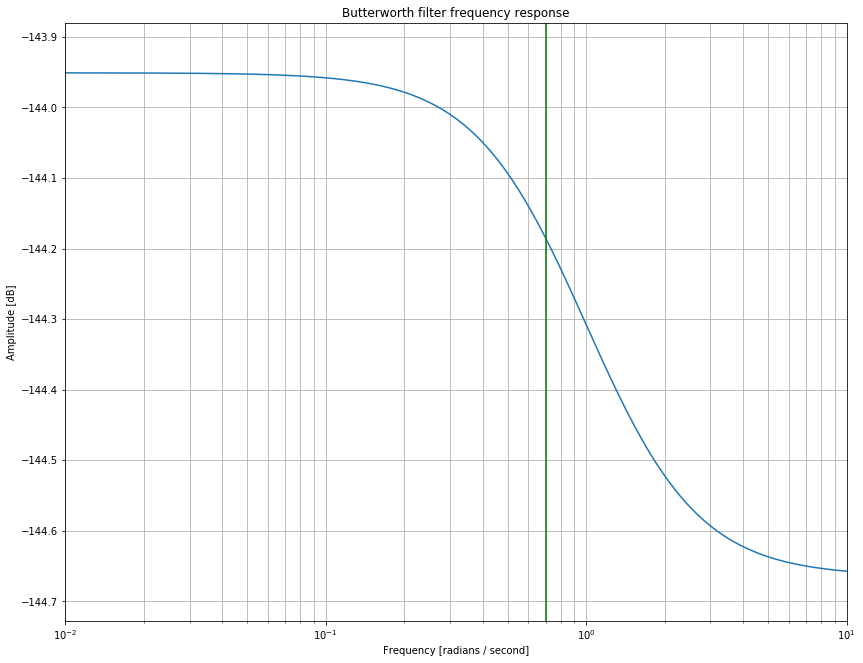

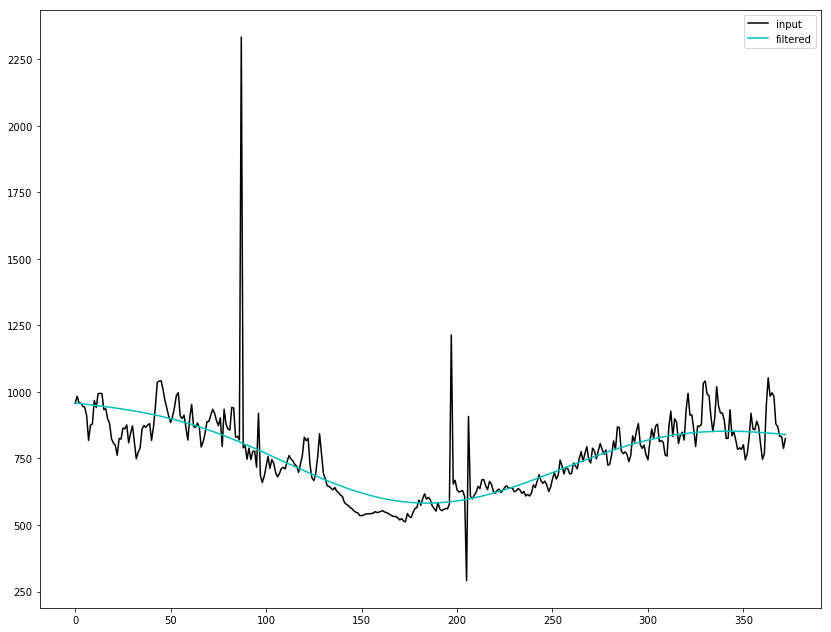

In [65]:
#BUTTERWORTH FILTER

from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

#Butterwoth filter: 4th order, cutoff frequency of 1000, low pass, analog
b, a = signal.butter(4, 0.01, 'low', analog=False)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(0.7, color='green') # cutoff frequency
plt.show()

archive = open(filename, 'r')
text = archive.readlines()
frequencies = []

for line in text:
    frequencies.append(int(line))
    
#print frequencies    
archive.close() 

frequencies = np.asarray(frequencies, dtype=np.intc)

n = 60
sig = np.random.randn(n)**3 + 3*np.random.randn(n).cumsum()
#print sig

filtered = signal.filtfilt(b, a, frequencies, padlen=150)
#print "FILTERED:"
#print filtered

plt.plot(frequencies, 'k-', label='input')
plt.plot(filtered, 'c-', linewidth=1.5, label='filtered')
plt.legend(loc='best')
plt.show()

# Chebychev I filter: 4h order

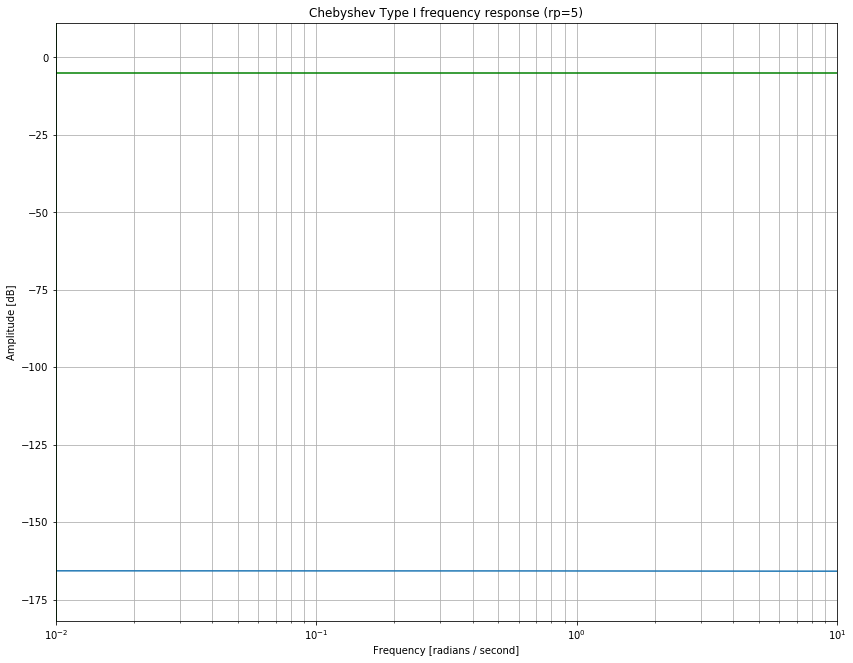

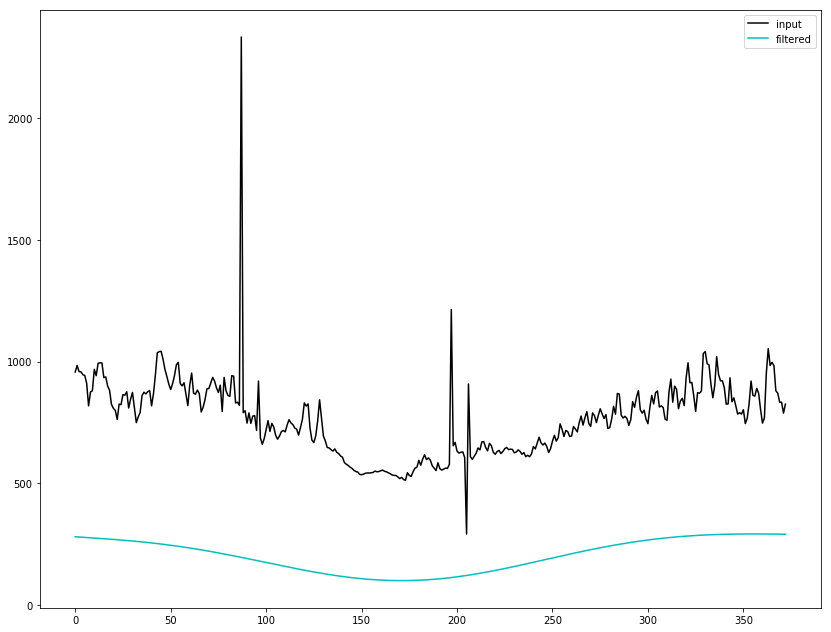

In [66]:
#CHEBYCHEV FILTER I

from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

#Chebychev filter I: 4th order, 5dB ripple allowed, cutoff frequency of 1000, low pass, analog
b, a = signal.cheby1(4, 5, 0.01, 'low', analog=False)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Chebyshev Type I frequency response (rp=5)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(0.01, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp
plt.show()

archive = open(filename, 'r')
text = archive.readlines()
frequencies = []

for line in text:
    frequencies.append(int(line))
    
#print frequencies    
archive.close() 

frequencies = np.asarray(frequencies, dtype=np.intc)

n = 60
sig = np.random.randn(n)**3 + 3*np.random.randn(n).cumsum()
#print sig

filtered = signal.filtfilt(b, a, frequencies, padlen=150)
#print "FILTERED:"
#print filtered

plt.plot(frequencies, 'k-', label='input')
plt.plot(filtered, 'c-', linewidth=1.5, label='filtered')
plt.legend(loc='best')
plt.show()

In [67]:
# Chebychev II filter: 4th order

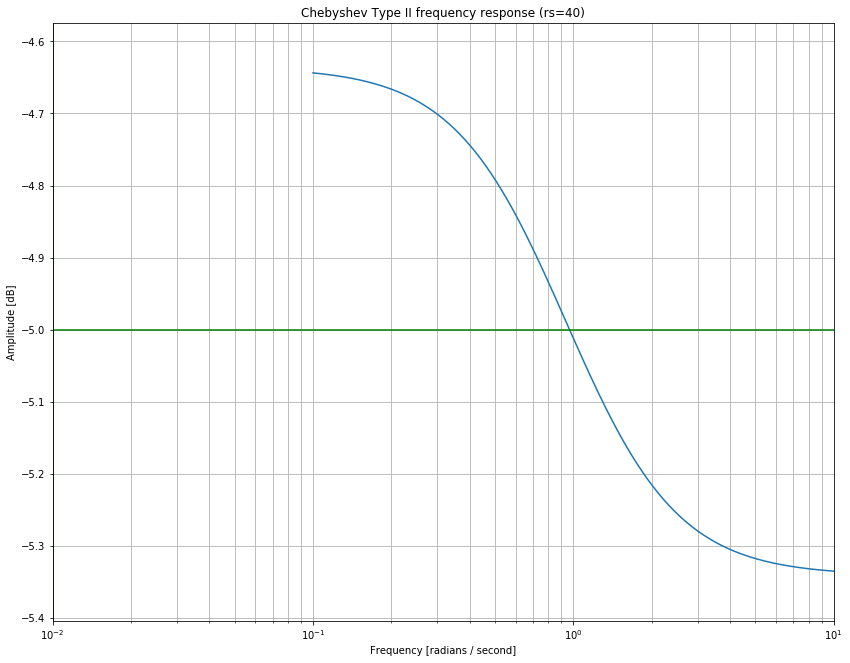

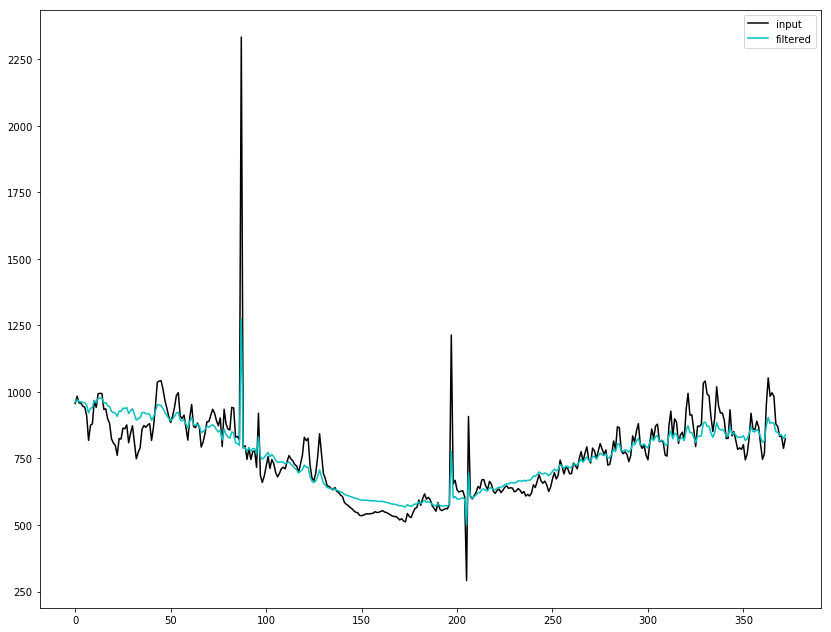

In [68]:
#CHEBYCHEV FILTER II

from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

#Chebychev filter II: 4th order, 40dB minimum attenuation, cutoff frequency of 1000, low pass, analog
b, a = signal.cheby2(4, 5, 0.01, 'low', analog=False)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type II frequency response (rs=40)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(0.01, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rs
plt.show()

archive = open(filename, 'r')
text = archive.readlines()
frequencies = []

for line in text:
    frequencies.append(int(line))
    
#print frequencies    
archive.close() 

frequencies = np.asarray(frequencies, dtype=np.intc)

n = 60
sig = np.random.randn(n)**3 + 3*np.random.randn(n).cumsum()
#print sig

filtered = signal.filtfilt(b, a, frequencies, padlen=150)
#print "FILTERED:"
#print filtered

plt.plot(frequencies, 'k-', label='input')
plt.plot(filtered, 'c-', linewidth=1.5, label='filtered')
plt.legend(loc='best')
plt.show()

# Bessel filter: 4th order

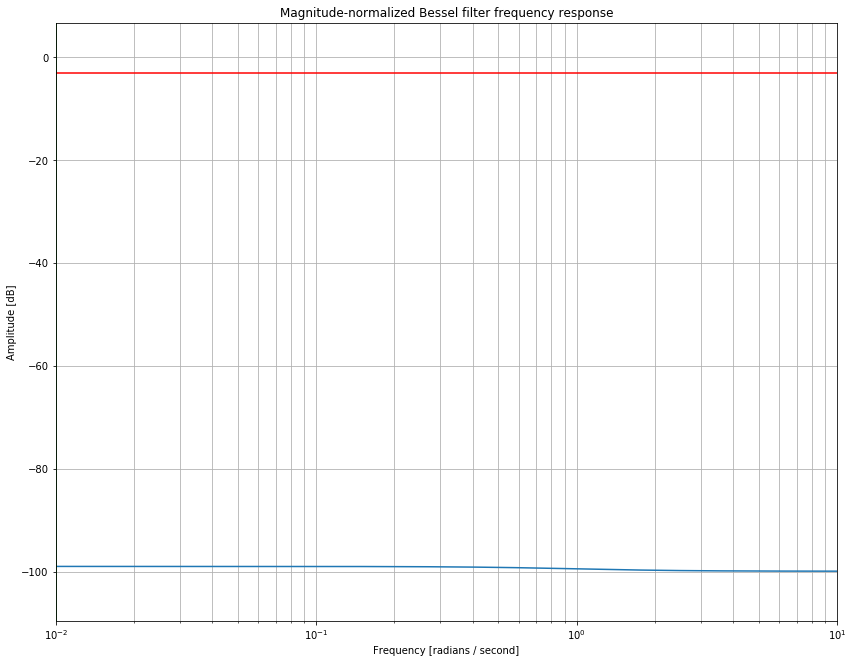

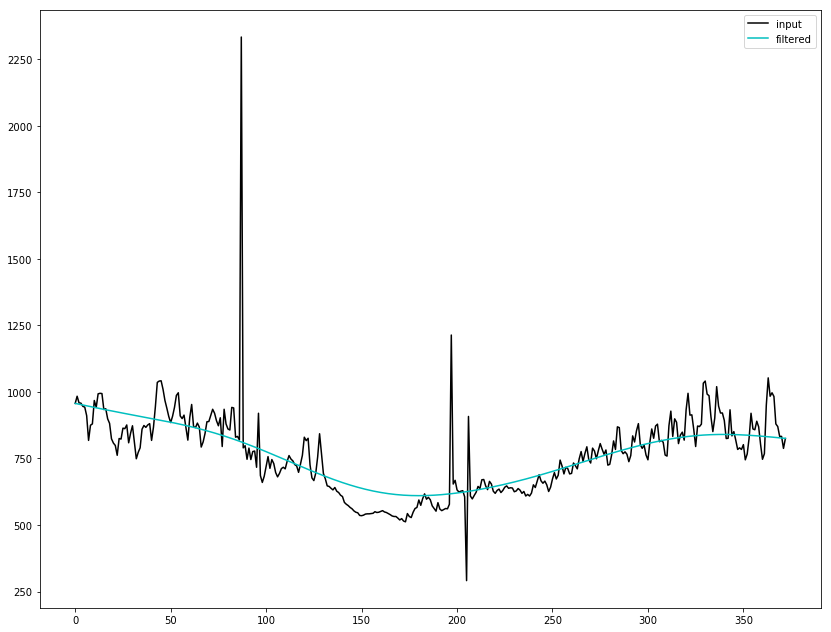

In [69]:
#BESSEL FILTER

from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

#Bessel filter: 3th order, cutoff frequency of 1000, low pass, analog
b, a = signal.bessel(3, 0.01, 'low', analog=False, norm='mag')
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(np.abs(h)))
plt.axhline(-3, color='red')  # -3 dB magnitude
plt.axvline(0.01, color='green')  # cutoff frequency
plt.title('Magnitude-normalized Bessel filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

archive = open(filename, 'r')
text = archive.readlines()
frequencies = []

for line in text:
    frequencies.append(int(line))
    
#print frequencies    
archive.close() 

frequencies = np.asarray(frequencies, dtype=np.intc)

n = 60
sig = np.random.randn(n)**3 + 3*np.random.randn(n).cumsum()
#print sig

filtered = signal.filtfilt(b, a, frequencies, padlen=150)
#print "FILTERED:"
#print filtered

plt.plot(frequencies, 'k-', label='input')
plt.plot(filtered, 'c-', linewidth=1.5, label='filtered')
plt.legend(loc='best')
plt.show()

# Moving window of means

In [70]:
def moving_average(a, n, threshold):
    wi = 0
    wf = n
    j = n
    while j < a.size:
        window = a[wi:wf]
        mean_window = np.mean(window)
        #print mean_window
        i = wi
        while i < wf:
            if a[i] > mean_window + threshold:
                a[i] = int(mean_window)
            if a[i] < mean_window - threshold:
                a[i] = int(mean_window)
            i = i + 1
        wi = wi + 1
        wf = wf + 1
        j = j + 1
    return a

In [71]:
#MOVING AVERAGE FILTER
init_notebook_mode(connected=True)

# Create random data with numpy
import numpy as np

archive = open(filename, 'r')
text = archive.readlines()
frequencies = []

for line in text:
    frequencies.append(int(line))
    
#print frequencies    
archive.close() 

frequencies = np.asarray(frequencies, dtype=np.intc)

filtered = moving_average(frequencies, 10, 200)

archive = open(filename, 'r')
text = archive.readlines()
frequencies = []

for line in text:
    frequencies.append(int(line))
    
#print frequencies    
archive.close() 

frequencies = np.asarray(frequencies, dtype=np.intc)

archive = open(file_filtered_by_hand, 'r')
text = archive.readlines()
frequencies_filtered = []

for line in text:
    frequencies_filtered.append(int(line))
    
#print frequencies    
archive.close() 

frequencies_filtered = np.asarray(frequencies_filtered, dtype=np.intc)

axis_x = np.linspace(0, (filtered.size)-1, filtered.size)
axis_y = filtered

axis_x2 = np.linspace(0, (frequencies.size)-1, frequencies.size)
axis_y2 = frequencies

axis_x3 = np.linspace(0, (frequencies_filtered.size)-1, frequencies_filtered.size)
axis_y3 = frequencies_filtered


# Create a trace
trace2 = go.Scatter(
    x = axis_x,
    y = axis_y,
    mode = 'lines',
    name = 'filtered'
)

trace1 = go.Scatter(
    x = axis_x2,
    y = axis_y2,
    mode = 'lines',
    name = 'frequencies'
)

trace3 = go.Scatter(
    x = axis_x3,
    y = axis_y3,
    mode = 'lines',
    name = 'filtered by hand'
)

layout = go.Layout(
    xaxis=dict(
        title='Samples'
        ),
    yaxis=dict(
        title='RR intervals (ms)'
        )
)

#data = [trace1, trace2, trace3]
data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='basic-line')

Saving the result file as **mean\_filter\_ + filename**.

In [72]:
#Saving file result
result = open("mean_filter_" + str(filename), 'w')
for i in range(len(filtered)):
    result.write(str(filtered[i])+"\n")
result.close()

# Moving window of medians

In [73]:
def moving_median(a, n, threshold):
    wi = 0
    wf = n
    j = n
    while j < a.size:
        window = a[wi:wf]
        median_window = np.median(window)
        i = wi
        while i < wf:
            if a[i] > median_window + threshold:
                a[i] = int(median_window)
            if a[i] < median_window - threshold:
                a[i] = int(median_window)
            i = i + 1
        wi = wi + 1
        wf = wf + 1
        j = j + 1
    return a

In [74]:
#MOVING MEDIAN FILTER

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

# Create random data with numpy
import numpy as np

archive = open(filename, 'r')
text = archive.readlines()
frequencies = []

for line in text:
    frequencies.append(int(line))
    
#print frequencies    
archive.close() 

frequencies = np.asarray(frequencies, dtype=np.intc)

filtered = moving_median(frequencies, 10, 200)

archive = open(filename, 'r')
text = archive.readlines()
frequencies = []

for line in text:
    frequencies.append(int(line))
    
#print frequencies    
archive.close() 

frequencies = np.asarray(frequencies, dtype=np.intc)

archive = open(file_filtered_by_hand, 'r')
text = archive.readlines()
frequencies_filtered = []

for line in text:
    frequencies_filtered.append(int(line))
    
#print frequencies    
archive.close() 

frequencies_filtered = np.asarray(frequencies_filtered, dtype=np.intc)

axis_x = np.linspace(0, (filtered.size)-1, filtered.size)
axis_y = filtered

axis_x2 = np.linspace(0, (frequencies.size)-1, frequencies.size)
axis_y2 = frequencies

axis_x3 = np.linspace(0, (frequencies_filtered.size)-1, frequencies_filtered.size)
axis_y3 = frequencies_filtered


# Create a trace
trace2 = go.Scatter(
    x = axis_x,
    y = axis_y,
    mode = 'lines',
    name = 'filtered'
)

trace1 = go.Scatter(
    x = axis_x2,
    y = axis_y2,
    mode = 'lines',
    name = 'frequencies'
)

trace3 = go.Scatter(
    x = axis_x3,
    y = axis_y3,
    mode = 'lines',
    name = 'filtered by hand'
)

layout = go.Layout(
    xaxis=dict(
        title='Samples'
        ),
    yaxis=dict(
        title='RR intervals (ms)'
        )
)

data = [trace1, trace2, trace3]
#data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='basic-line')

Saving the result file as **median\_filter\_ + filename**.

In [75]:
#Saving file result
result = open("median_filter_" + str(filename), 'w')
for i in range(len(filtered)):
    result.write(str(filtered[i])+"\n")
result.close()